In [33]:
# Change working directory
os.chdir('/Users/suongsuong/Documents/GitHub/Reactivity-based-metric-of-complexity/Reduction of ketone/')

import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from mlxtend.feature_selection import SequentialFeatureSelector

import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
def significance_marker(p):
    if 0 < p <= 0.001:
        return '***'
    elif 0.001 < p <= 0.01:
        return '**'
    elif p <= 0.05:
        return '*'
    elif p <= 0.1:
        return '.'
    else:
        return ''

In [35]:
def run_OLS_plots(X,y):
    X_train,X_test,y_train,y_test =train_test_split(X,y,test_size=0.2)
    model = LinearRegression()
    model = sm.OLS(y_train, X_train).fit()
    y_pred = model.predict(X_test)

    print('R squared:', r2_score(y_test, y_pred))
    print('MAE:', mean_absolute_error(y_test, y_pred))

    ### model
    results_df = pd.DataFrame({
        'Feature': X.columns,
        'Coefficient': model.params,
        'P-value': model.pvalues
    }).reset_index(drop=True)

    results_df['Significance'] = results_df['P-value'].apply(significance_marker)

    # Create a bar plot
    plt.figure(figsize=(10, 6))
    ax = sns.barplot(data=results_df, y='Feature', x='Coefficient', color='cornflowerblue')

    # Add significance markers as annotations
    for i, (coef, marker) in enumerate(zip(results_df['Coefficient'], results_df['Significance'])):
        ax.text(0, i, f' {marker}', color='black', va='center')

    # Customize plot
    # plt.xticks(rotation=45, horizontalalignment='right')
    plt.ylabel('Features')
    plt.xlabel('Estimated Coefficient')
    plt.show()
    print('P-values:0 *** 0.001 ** 0.01 * 0.05 . 0.1  1')
    return model

In [36]:
data = pd.read_excel('Reactant_features.xlsx')

columns_to_keep = ['Sterimol_L', 'Sterimol_Bmin', 'Sterimol_Bmax',
       'PBV', 'Ring', 'aroma_Ring', 'Carbons', 'Chiral Carbons', 'sp3 Carbons',
       'HA', 'Cm', 'Cm/HA', 'SPS', 'nSPS', 'F_sp3', 'F_Cstereo', 'C_T',
       'Harary', 'GraphDistance', 'Diameter', 'Platt', 'SimpleTopo',
       'GeometricTopo', 'ArithmeticTopo', 'MolSizeTotalInf', 'Reactant MW',  'Yield (number)']

data_features = data[columns_to_keep]
data_features.shape

(906, 27)

# <span style="color:blue"> Fitting with splitted data </span>

R squared: 0.1935878305967016
MAE: 13.894052524151569


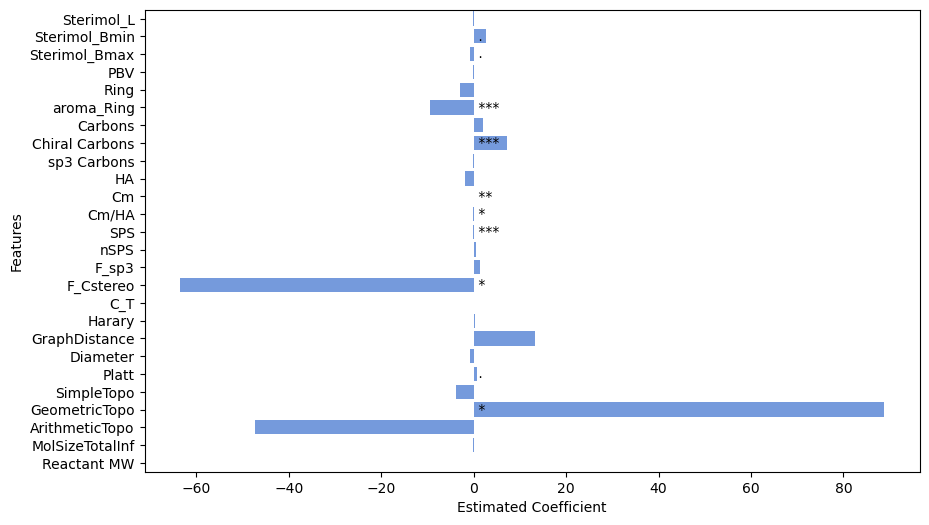

P-values:0 *** 0.001 ** 0.01 * 0.05 . 0.1  1


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:         Yield (number)   R-squared (uncentered):                   0.956
Model:                            OLS   Adj. R-squared (uncentered):              0.955
Method:                 Least Squares   F-statistic:                              585.9
Date:                Tue, 30 Jul 2024   Prob (F-statistic):                        0.00
Time:                        14:34:32   Log-Likelihood:                         -3076.6
No. Observations:                 724   AIC:                                      6205.
Df Residuals:                     698   BIC:                                      6324.
Df Model:                          26                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Sterimol_L         -0.1086      0.425     -0.255      0.799      -0.943       0.726
Sterimol_Bmin       2.6113      1.370      1.905      0.057      -0.079       5.302
Sterimol_Bmax      -0.8686      0.507     -1.713      0.087      -1.864       0.127
PBV                -0.2285      0.153     -1.498      0.134      -0.528       0.071
Ring               -2.8936      4.431     -0.653      0.514     -11.592       5.805
aroma_Ring         -9.4513      2.727     -3.465      0.001     -14.806      -4.096
Carbons             2.1044      2.744      0.767      0.443      -3.283       7.491
Chiral Carbons      7.2217      1.959      3.686      0.000       3.375      11.068
sp3 Carbons        -0.1907      1.003     -0.190      0.849      -2.159       1.778
HA                 -1.9475      2.572     -0.757      0.449      -6.997       3.102
Cm                  0.0608      0.022      2.720      0.007       0.017       0.105
Cm/HA              -0.1171      0.053     -2.229      0.026      -0.220      -0.014
SPS                -0.0878      0.019     -4.528      0.000      -0.126      -0.050
nSPS                0.5267      0.378      1.394      0.164      -0.215       1.269
F_sp3               1.3933     10.900      0.128      0.898     -20.007      22.794
F_Cstereo         -63.5758     31.690     -2.006      0.045    -125.795      -1.356
C_T                -0.0143      0.016     -0.884      0.377      -0.046       0.018
Harary              0.3331      0.245      1.362      0.174      -0.147       0.813
GraphDistance      13.3173     10.364      1.285      0.199      -7.032      33.666
Diameter           -0.7005      0.709     -0.988      0.324      -2.093       0.692
Platt               0.7478      0.408      1.834      0.067      -0.053       1.548
SimpleTopo         -3.7486      2.969     -1.262      0.207      -9.578       2.081
GeometricTopo      88.8440     39.661      2.240      0.025      10.974     166.714
ArithmeticTopo    -47.3691     40.051     -1.183      0.237    -126.004      31.266
MolSizeTotalInf    -0.0966      0.068     -1.418      0.157      -0.230       0.037
Reactant MW        -0.0061      0.033     -0.185      0.853      -0.071       0.059
==============================================================================
Omnibus:                      125.225   Durbin-Watson:                   2.022
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              210.717
Skew:                          -1.074   Prob(JB):                     1.75e-46
Kurtosis:                       4.540   Cond. No.                     1.04e+05
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model 

In [37]:
X = data_features.drop(columns = 'Yield (number)')
y = data_features['Yield (number)']
model_full = run_OLS_plots(X,y)
model_full.summary()

# <span style="color:blue"> Remove multicollinearity by taking those having VIF <10 </span>

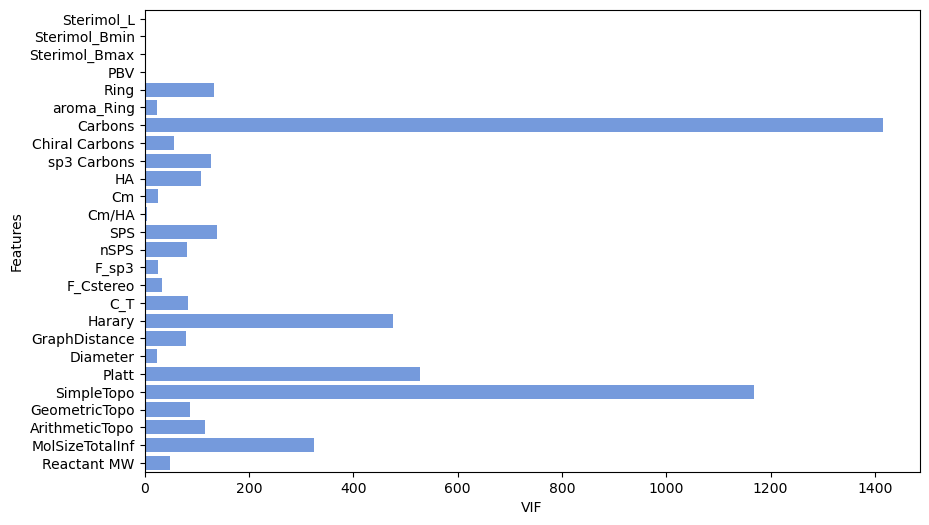

In [38]:
# Calculate VIF for each feature
X = data_features.drop(columns='Yield (number)')
X = sm.add_constant(X)  

vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_data=vif_data[vif_data['Feature'] != 'const']
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=vif_data, y='Feature', x='VIF', color='cornflowerblue')
# Customize plot
# plt.xticks(rotation=45, horizontalalignment='right')
plt.ylabel('Features')
plt.xlabel('VIF')
plt.show()

R squared: -0.18659174999990302
MAE: 17.177907360206177


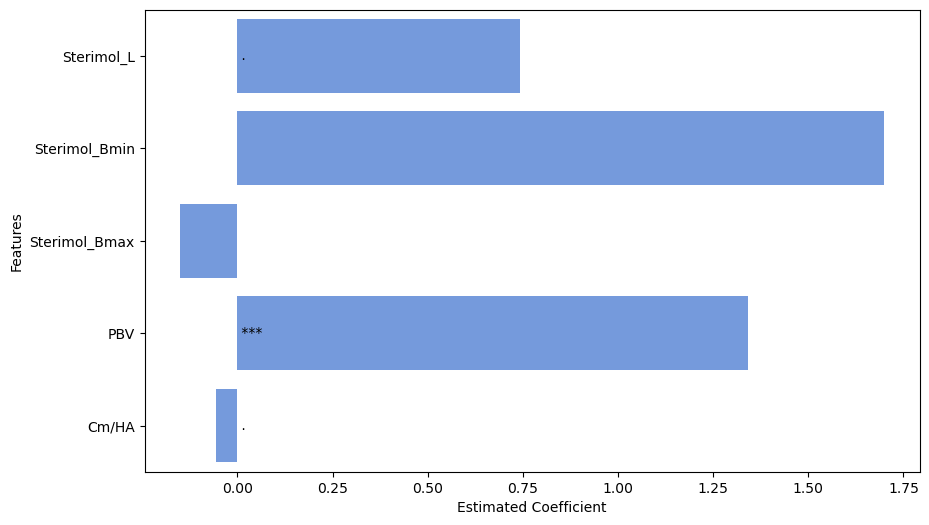

P-values:0 *** 0.001 ** 0.01 * 0.05 . 0.1  1


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:         Yield (number)   R-squared (uncentered):                   0.926
Model:                            OLS   Adj. R-squared (uncentered):              0.925
Method:                 Least Squares   F-statistic:                              1793.
Date:                Tue, 30 Jul 2024   Prob (F-statistic):                        0.00
Time:                        14:34:33   Log-Likelihood:                         -3267.2
No. Observations:                 724   AIC:                                      6544.
Df Residuals:                     719   BIC:                                      6567.
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Sterimol_L        0.7430      0.379      1.958      0.051      -0.002       1.488
Sterimol_Bmin     1.6997      1.547      1.099      0.272      -1.338       4.737
Sterimol_Bmax    -0.1515      0.358     -0.423      0.673      -0.855       0.552
PBV               1.3410      0.101     13.213      0.000       1.142       1.540
Cm/HA            -0.0570      0.034     -1.685      0.092      -0.123       0.009
==============================================================================
Omnibus:                       94.701   Durbin-Watson:                   1.971
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              130.259
Skew:                          -0.982   Prob(JB):                     5.18e-29
Kurtosis:                       3.681   Cond. No.                         161.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [39]:
features_list = vif_data[vif_data["VIF"]<10]['Feature'].tolist()

X = X[features_list]
model_VIF = run_OLS_plots(X,y)
model_VIF.summary()

# <span style="color:blue"> Selection of features </span>

#### Forward selection

Features: 26/26

R squared: 0.12740659226013207
MAE: 13.820284597574116


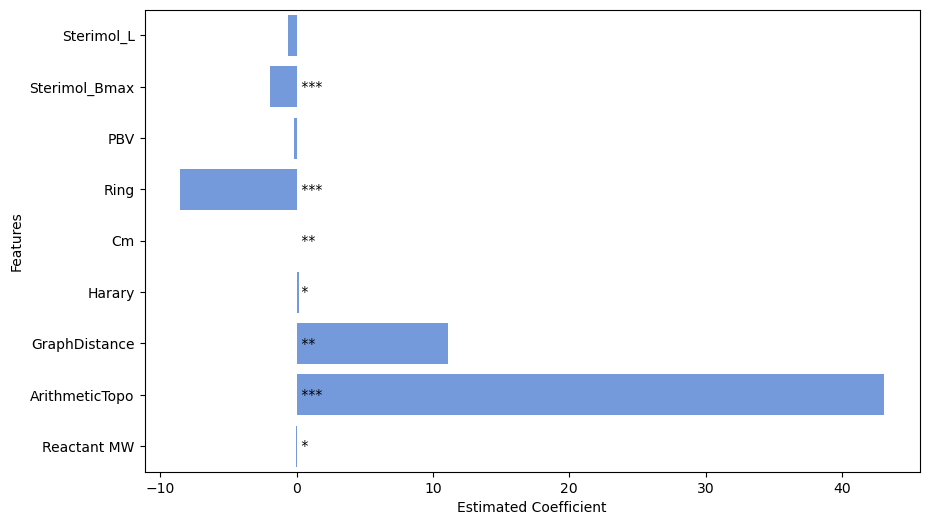

P-values:0 *** 0.001 ** 0.01 * 0.05 . 0.1  1


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:         Yield (number)   R-squared (uncentered):                   0.952
Model:                            OLS   Adj. R-squared (uncentered):              0.951
Method:                 Least Squares   F-statistic:                              1566.
Date:                Tue, 30 Jul 2024   Prob (F-statistic):                        0.00
Time:                        14:52:55   Log-Likelihood:                         -3111.8
No. Observations:                 724   AIC:                                      6242.
Df Residuals:                     715   BIC:                                      6283.
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Sterimol_L        -0.6266      0.381     -1.645      0.100      -1.374       0.121
Sterimol_Bmax     -1.9607      0.423     -4.636      0.000      -2.791      -1.130
PBV               -0.1748      0.133     -1.314      0.189      -0.436       0.086
Ring              -8.5812      0.635    -13.521      0.000      -9.827      -7.335
Cm                 0.0321      0.010      3.063      0.002       0.012       0.053
Harary             0.1322      0.063      2.113      0.035       0.009       0.255
GraphDistance     11.1267      4.296      2.590      0.010       2.692      19.561
ArithmeticTopo    43.1140      5.319      8.106      0.000      32.671      53.557
Reactant MW       -0.0620      0.027     -2.310      0.021      -0.115      -0.009
==============================================================================
Omnibus:                      163.325   Durbin-Watson:                   1.868
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              322.075
Skew:                          -1.280   Prob(JB):                     1.15e-70
Kurtosis:                       5.031   Cond. No.                     4.73e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 4.73e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [53]:
X = data_features.drop(columns = 'Yield (number)')
y = data_features['Yield (number)']
X_train,X_test,y_train,y_test =train_test_split(X,y,test_size=0.2)
model = LinearRegression()
forwad = SequentialFeatureSelector(
model,
k_features='best',
forward=True,
verbose=1,
scoring="neg_mean_absolute_error"
)
sf = forwad.fit(X,y)
feat_names = list(sf.k_feature_names_)

# Run model with selected features
X = X[feat_names]
model_forward = run_OLS_plots(X,y)
model_forward.summary()

#### Backward selection

R squared: 0.20449890427805195
MAE: 13.758902579001182


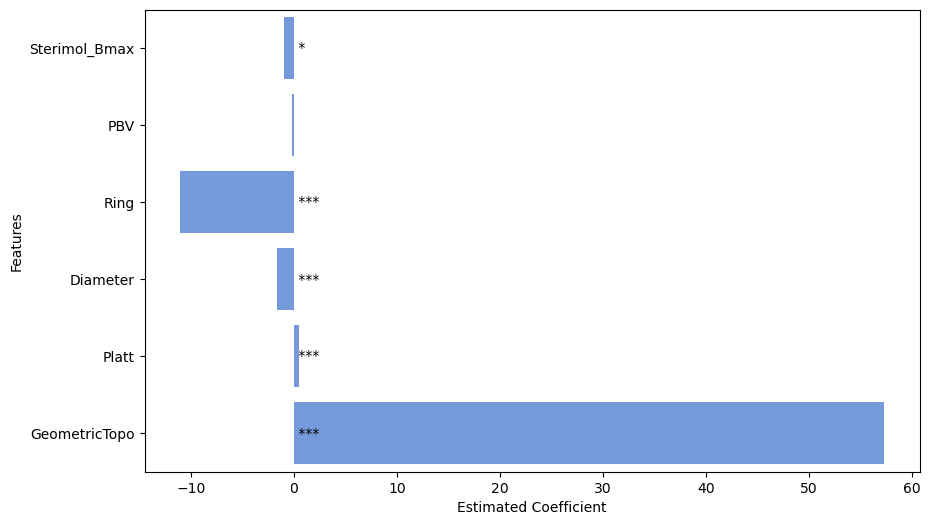

P-values:0 *** 0.001 ** 0.01 * 0.05 . 0.1  1


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:         Yield (number)   R-squared (uncentered):                   0.953
Model:                            OLS   Adj. R-squared (uncentered):              0.953
Method:                 Least Squares   F-statistic:                              2427.
Date:                Tue, 30 Jul 2024   Prob (F-statistic):                        0.00
Time:                        14:54:38   Log-Likelihood:                         -3101.8
No. Observations:                 724   AIC:                                      6216.
Df Residuals:                     718   BIC:                                      6243.
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Sterimol_Bmax    -0.9777      0.417     -2.345      0.019      -1.796      -0.159
PBV              -0.1701      0.112     -1.515      0.130      -0.390       0.050
Ring            -11.0848      0.739    -14.997      0.000     -12.536      -9.634
Diameter         -1.6609      0.243     -6.830      0.000      -2.138      -1.183
Platt             0.4487      0.047      9.618      0.000       0.357       0.540
GeometricTopo    57.3124      3.402     16.845      0.000      50.633      63.992
==============================================================================
Omnibus:                      141.499   Durbin-Watson:                   1.937
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              252.961
Skew:                          -1.167   Prob(JB):                     1.18e-55
Kurtosis:                       4.713   Cond. No.                         514.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [55]:
X = data_features.drop(columns = 'Yield (number)')
y = data_features['Yield (number)']
X_train,X_test,y_train,y_test =train_test_split(X,y,test_size=0.2)
model = LinearRegression()
forwad = SequentialFeatureSelector(
model,
k_features='best',
forward=False,
cv = 5,
scoring="neg_mean_absolute_error"
)
sf = forwad.fit(X,y)
feat_names = list(sf.k_feature_names_)

# Run model with selected features
X = X[feat_names]
model_backward = run_OLS_plots(X,y)
model_backward.summary()